[[ 1  2  2  2  2  2  2  2  2  2  2  2  2  2  2]
 [ 1  2  4  4  4  4  4  4  4  4  4  4  4  4  4]
 [ 1  2  4  6  6  6  6  6  6  6  6  6  6  6  6]
 [ 1  2  4  6  9  9  9  9  9  9  9  9  9  9  9]
 [ 1  2  4  6  9 12 12 12 12 12 12 12 12 12 12]
 [ 1  2  4  6  9 12 17 17 17 17 17 17 17 17 17]
 [ 1  2  4  6  9 12 17 22 22 22 22 22 22 22 22]
 [ 1  2  4  6  9 12 17 22 27 27 27 27 27 27 27]
 [ 1  2  4  6  9 12 17 22 27 33 33 33 33 33 33]
 [ 1  2  4  6  9 12 17 22 27 33 38 38 38 38 38]
 [ 1  2  4  6  9 12 17 22 27 33 38 42 42 42 42]
 [ 1  2  4  6  9 12 17 22 27 33 38 42 45 45 45]
 [ 1  2  4  6  9 12 17 22 27 33 38 42 45 46 45]
 [ 1  2  4  6  9 12 17 22 27 33 38 42 45 45 45]
 [ 1  2  4  6  9 12 17 22 27 33 38 42 42 42 42]] 

{(-1, 0): 2, (0, 1): 4, (1, 0): 2, (-1, -1): 1, (1, -1): 1, (-1, 1): 2, (1, 1): 4, (0, -1): 1} 

{(-1, 0): 4, (0, -1): 2, (1, -1): 2, (-1, -1): 2, (0, 1): 6, (1, 1): 6, (1, 0): 4, (-1, 1): 4} 

{(0, 1): 6, (-1, -1): 4, (1, 1): 9, (-1, 1): 4, (1, 0): 6, (0, -1): 4, (1, -1): 4, 

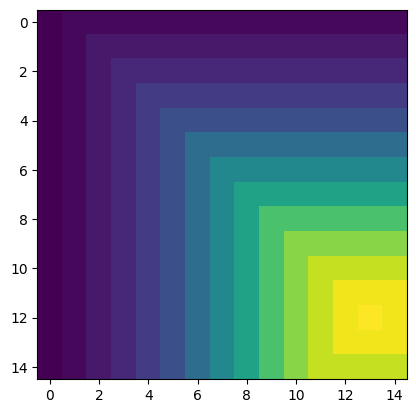

In [1]:
%reload_ext autoreload
%autoreload 2

# import sys
import numpy as np
# numpy.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold= np.inf)

from Grid import Grid, Point
from Engine import Engine
import initial_states

init_config = {'tip_cells': [Point(1,1)],
               'attractor_cells': initial_states.Attractors_small2}
grid = Grid(width=15, height=15, init_config=init_config)
engine = Engine(init_grid=grid, generations=100)
engine.run()

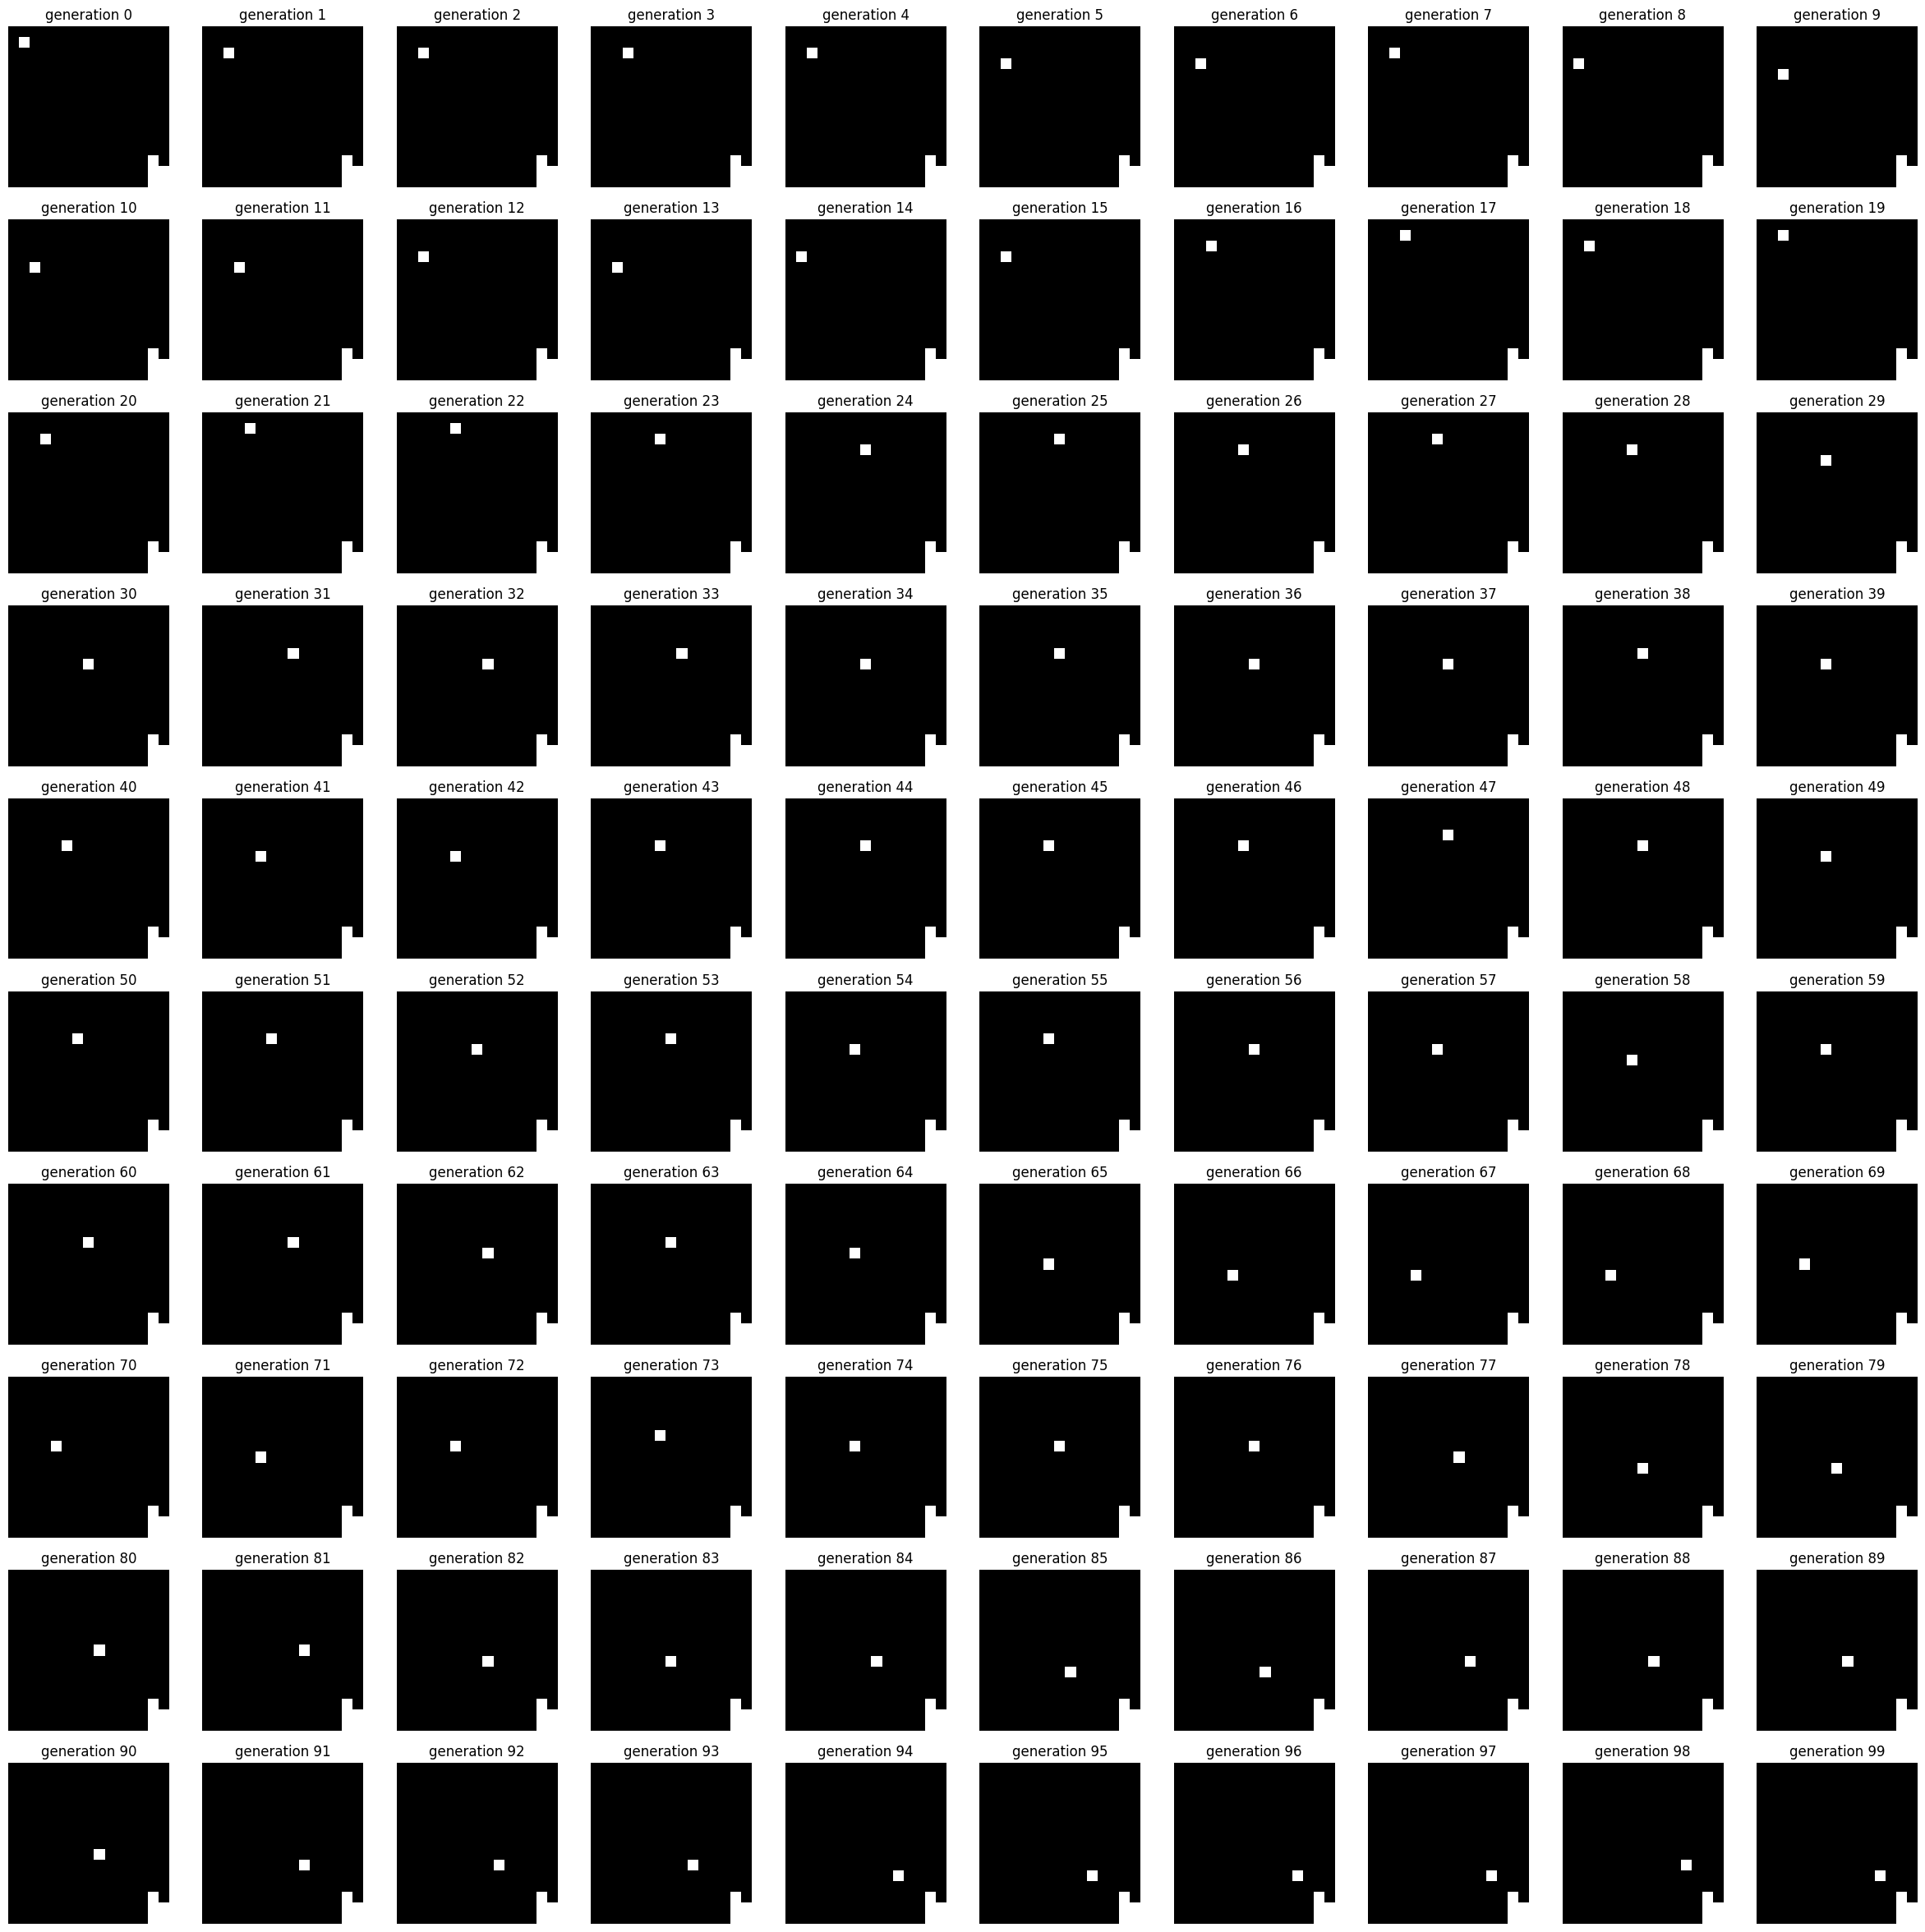

In [2]:
engine.visualize()

In [9]:
import matplotlib.pyplot as plt
def generate_concentration_gradient(source_location, matrix_size, decay_rate, initial_concentration):
    """
    Generates a matrix representing the concentration gradient from a single source
    
    Parameters:
        - source_location (tuple): The (x, y) coordinates of the source
        - matrix_size (int): The size of the matrix (matrix is square, so this is the width and height)
        - decay_rate (float): The rate at which the concentration decreases as distance from the source increases
        - initial_concentration (float): The concentration of the source
        
    Returns:
        - concentration_matrix (2D numpy array): The matrix representing the concentration gradient
    """
    x, y = source_location
    concentration_matrix = np.zeros((matrix_size, matrix_size))
    for i in range(matrix_size):
        for j in range(matrix_size):
            distance = ((i - x) ** 2 + (j - y) ** 2) ** 0.5
            concentration = initial_concentration * np.exp(-decay_rate * distance)
            concentration_matrix[i, j] = concentration
    return concentration_matrix

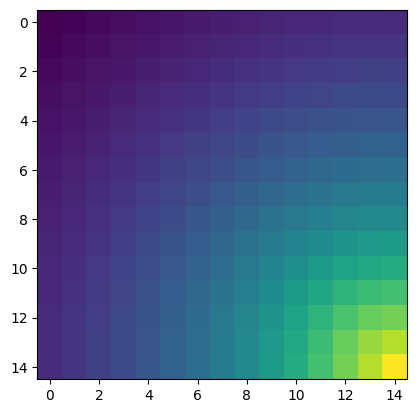

In [13]:
source_location = (14, 14)
matrix_size = 15
decay_rate = 0.1
initial_concentration = 2

concentration_matrix = generate_concentration_gradient(source_location, matrix_size, decay_rate, initial_concentration)
plt.imshow(concentration_matrix)